In [1]:
from pop4sim import fetch_wpp, Demography, ModelODE, reform_pars_all
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
def draw_gof(sol, demo):
    years = demo.Years
    nd = np.array([demo(t)['N'] for t in demo.Years])
    ns = sol.sol(years).reshape(nd.shape)
    errors = (ns / nd - 1) ** 2
    
    fig, axes = plt.subplots(1, 2)
    axes[0].scatter(x=years, y=nd)
    axes[0].plot(years, ns)
    axes[0].set_title('Population')

    axes[1].scatter(x=years, y=errors)
    axes[1].hlines(y=1e-5, xmin=years[0], xmax=years[-1])
    axes[1].hlines(y=-1e-5, xmin=years[0], xmax=years[-1])
    axes[1].set_title('Errors')

    fig.tight_layout()
    
    return fig, axes, errors

In [3]:
ext = fetch_wpp(loc='IN', year0=2000, year1=2010)

Fetch population size


100%|██████████| 12.0/12 [00:12<00:00,  1.07s/it]


Fetch deaths


100%|██████████| 12.0/12 [00:08<00:00,  1.35it/s]


Fetch birth rate


100%|██████████| 12.0/12 [00:00<00:00, 18157.16it/s]


Fetch sex ratio at birth


100%|██████████| 12.0/12 [00:00<00:00, 113872.51it/s]


## Aggregage population

In [4]:
demo = reform_pars_all(ext, mig=False)
model = ModelODE(demo)
t_span = demo.YearSpan
y0 = model.get_y0(t_span[0])
sol = solve_ivp(model, y0=y0.reshape(-1), t_span=demo.YearSpan, dense_output=True)

7.536595512513206e-05


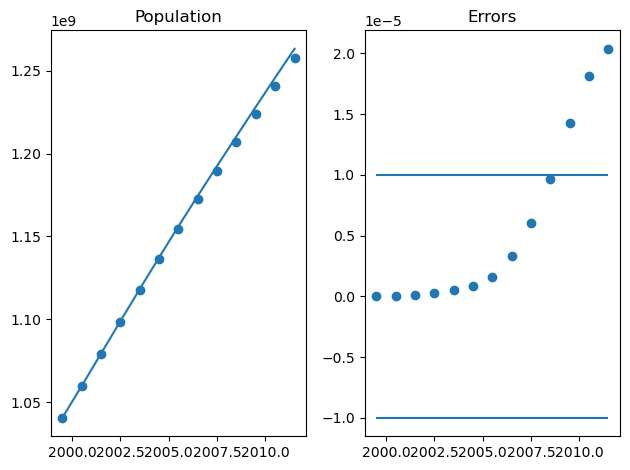

In [5]:
fig, axes, errors = draw_gof(sol, demo)
print(errors.sum())

In [6]:
demo = reform_pars_all(ext, mig=True)
model = ModelODE(demo)
t_span = demo.YearSpan
y0 = model.get_y0(t_span[0])
sol = solve_ivp(model, y0=y0.reshape(-1), t_span=demo.YearSpan, dense_output=True)

1.8937224527250177e-07


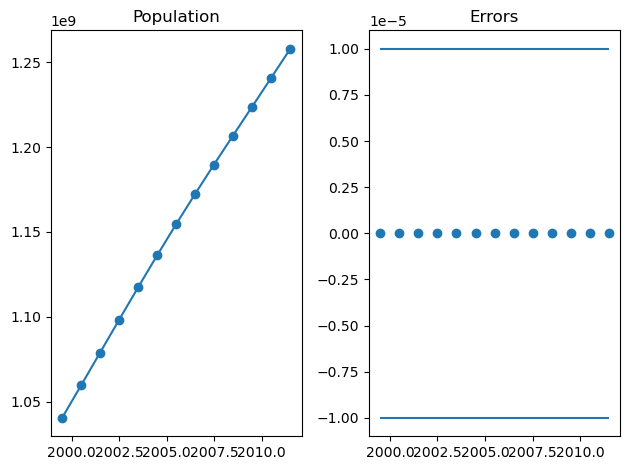

In [7]:
fig, axes, errors = draw_gof(sol, demo)
print(errors.sum())